<a href="https://colab.research.google.com/github/Ramdao/SoftwarePackagesHW-1-2-3-/blob/main/Problem_set_1_Software_Package_Tashrif_Radin_Ali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.Analyse retail sales data to identify trends, seasonal patterns, and product performance.

Dataset: https://archive.ics.uci.edu/dataset/352/online+retail


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("Online Retail.csv",on_bad_lines='skip')

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna(subset=['Description'],axis=0)
df = df.dropna(subset=['CustomerID'],axis=0)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


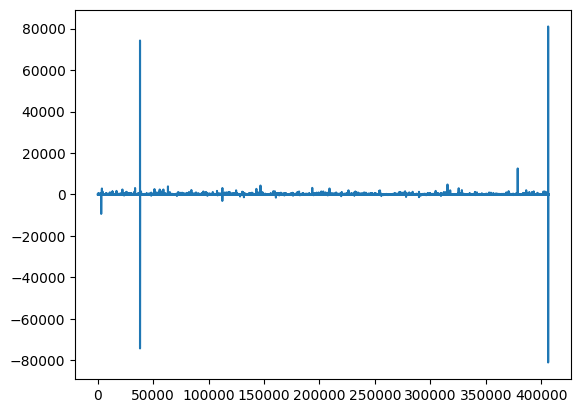

In [ ]:
labels =  np.arange(0,406829)
_ = plt.figure()
plt.plot(labels,df["Quantity"])
plt.show()

In [ ]:
df2 = df[:1000]
df2["Month"] = pd.to_datetime(df2["InvoiceDate"])

<ipython-input-8-562f1cd01022>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Month"] = pd.to_datetime(df2["InvoiceDate"])


Cleaning data


In [ ]:
#Quantity cannot be a negeative number removing all rows that have negatvie numbers


for i in df2["Quantity"]:
  if(i<0):
   i=df2[df2["Quantity"]==i].index
   df2=df2.drop(i)

#maybe leave this out since all are positive
#for i in df["UnitPrice"]:
#  if(i<0):
#   i=df[df["UnitPrice"]==i].index
#    df=df.drop(i)




product performance


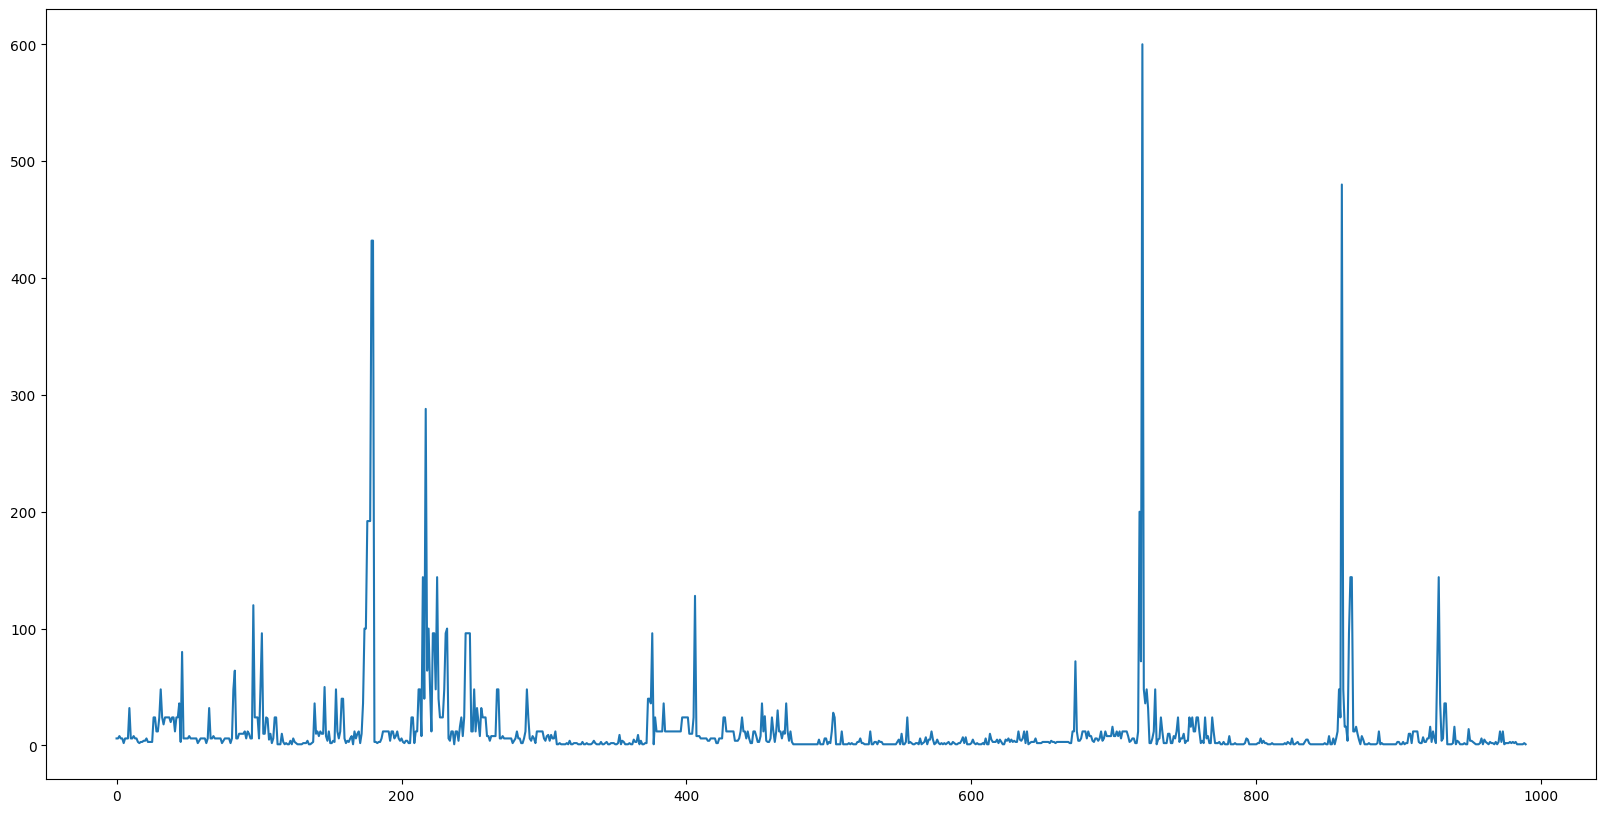

In [ ]:
Range =  np.arange(0,len(df2))
_ = plt.figure(figsize=(20, 10))
plt.plot(Range,df2["Quantity"] )
plt.show()

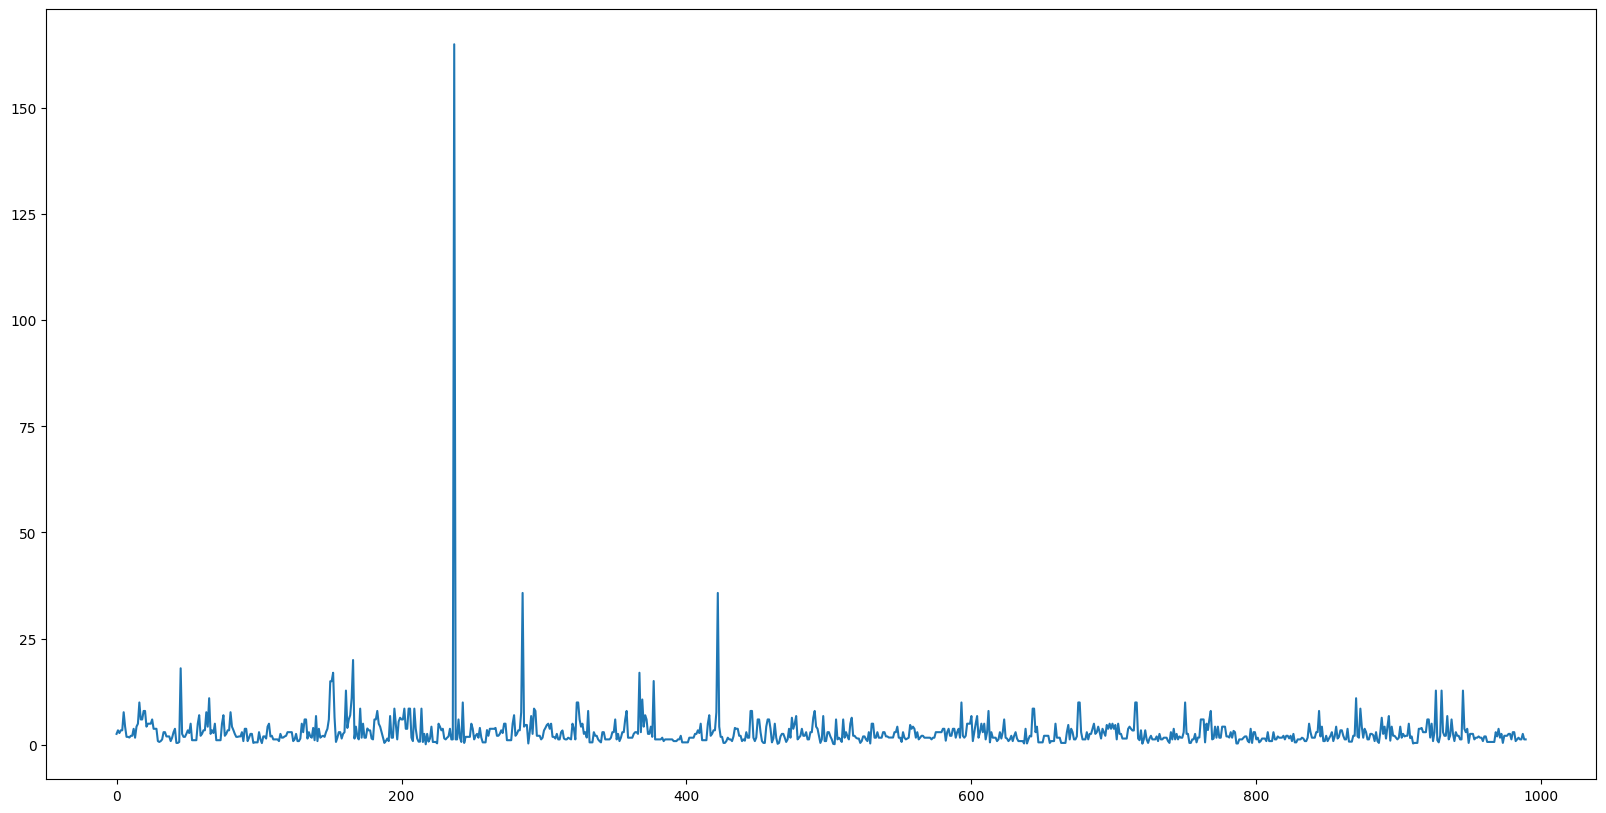

In [ ]:
_ = plt.figure(figsize=(20, 10))
plt.plot(Range,df2["UnitPrice"] )
plt.show()

In [ ]:
yearly_trend = df2.rolling(window=12).mean()

<ipython-input-12-8c11e08f82c5>:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Country', 'Description', 'InvoiceDate', 'Month', 'StockCode'], dtype='object')
  yearly_trend = df2.rolling(window=12).mean()


Trend

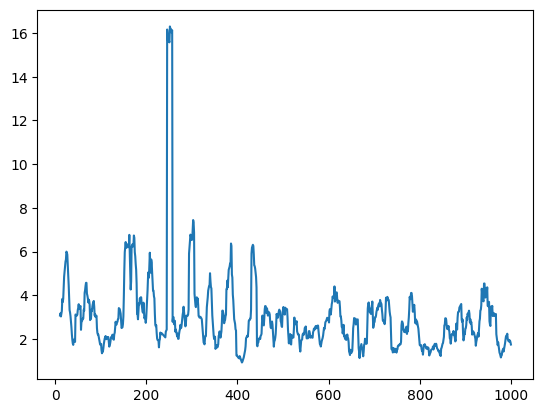

In [ ]:
plt.plot(df2.index, yearly_trend["UnitPrice"], label="12 Months Rolling")

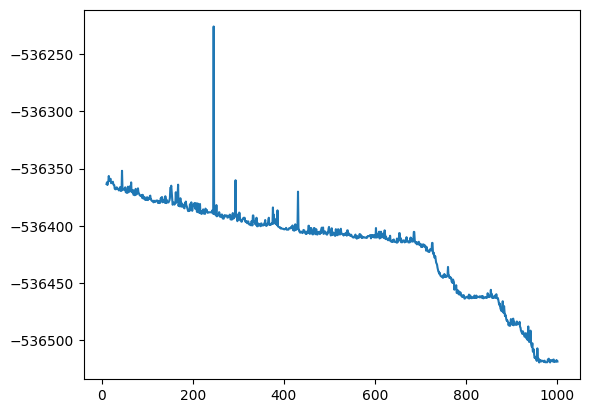

In [ ]:
seasonality = df2["UnitPrice"] - yearly_trend.values.T[0]
plt.plot(df2.index, seasonality, label="Seasonality")

**3rd Point**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
ticker = "TSLA"
df3 = yf.download(ticker, start="2000-01-01", end="2023-12-05")
df3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-11-28,236.679993,247.000000,234.009995,246.720001,246.720001,148549900
2023-11-29,249.210007,252.750000,242.759995,244.139999,244.139999,135401300
2023-11-30,245.139999,245.220001,236.910004,240.080002,240.080002,132353200


In [ ]:
df3.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df3["Date"] = pd.to_datetime(df3.index)

In [ ]:
df3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3382.000000,3382.000000,3382.000000,3382.000000,3382.000000,3.382000e+03
mean,69.547347,71.088009,67.885369,69.528111,69.528111,9.671506e+07
std,100.992236,103.258976,98.493682,100.914651,100.914651,8.023777e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.400167,10.822333,10.205000,10.508667,10.508667,4.574588e+07
50%,16.864667,17.131333,16.617333,16.877000,16.877000,8.096175e+07
75%,99.633669,102.268997,97.383333,99.679335,99.679335,1.233068e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
#change window to see effect
#trend
df3["Rolling Mean"] = df3["Adj Close"].rolling(window=60).mean()
df3["Rolling Std"] = df3["Adj Close"].rolling(window=60).std()
df3.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Rolling Mean,Rolling Std
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010-06-29,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010-06-30,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010-07-01,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010-07-02,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010-07-06,NaN,NaN


Trends


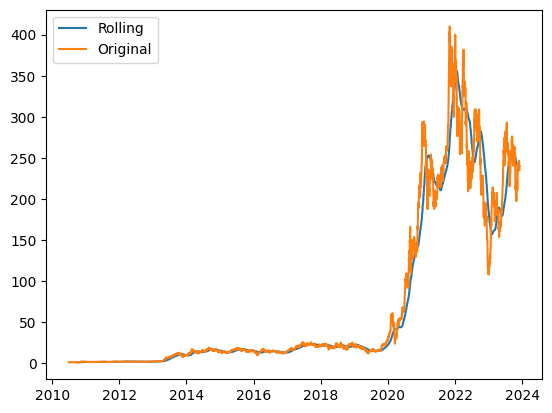

In [ ]:
_ = plt.figure()
plt.plot(df3["Date"], df3["Rolling Mean"], label="Rolling")
plt.plot(df3["Date"], df3["Adj Close"], label="Original")
plt.legend()
plt.show()

**volatilities**

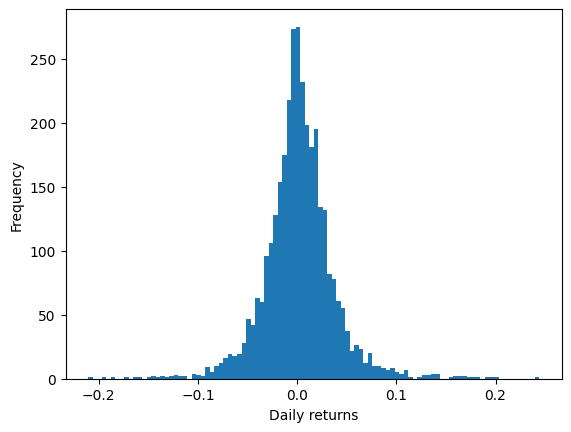

In [ ]:
returns = df3["Adj Close"].pct_change()

_ = plt.figure()
plt.hist(returns.dropna(), bins=100)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()

potential investment opportunities.



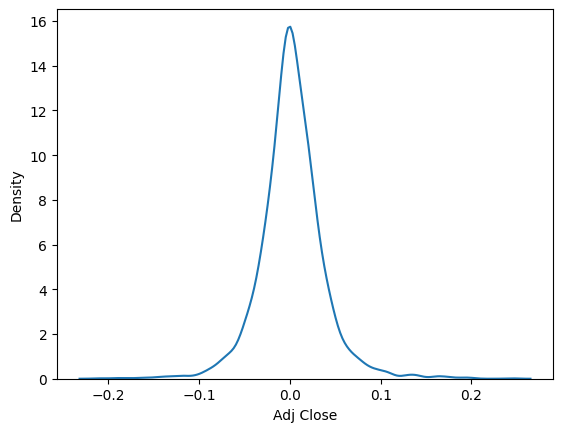

In [ ]:
import seaborn as sns

_ = plt.figure()
sns.kdeplot(returns)
plt.show()

In [ ]:
bootstrap_means = []
n_trials = 10000
for _ in range(n_trials):
    bootstrap_sample = np.random.choice(returns.dropna(), replace=True, size=1000)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)
bootstrap_means = np.array(bootstrap_means)
np.mean(bootstrap_means)

0.0021114595032490704